In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, SimpleRNN
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
num_labels = len(np.unique(y_train))

In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
image_size = x_train.shape[1]
x_train = np.reshape(x_train,[-1, image_size, image_size])
x_test = np.reshape(x_test,[-1, image_size, image_size])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [10]:
input_shape = (image_size, image_size)
batch_size = 128
units = 256
dropout = 0.2

In [11]:
model = Sequential()
model.add(SimpleRNN(units=units,
                    dropout=dropout,
                    input_shape=input_shape))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 256)               72960     
                                                                 
 dense (Dense)               (None, 10)                2570      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [15]:
history=model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

history.history.keys()

_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
469/469 [==============================] - 31s 66ms/step - loss: 0.1001 - accuracy: 0.9696
Epoch 2/20
469/469 [==============================] - 30s 65ms/step - loss: 0.0965 - accuracy: 0.9705
Epoch 3/20
469/469 [==============================] - 30s 65ms/step - loss: 0.0926 - accuracy: 0.9716
Epoch 4/20
469/469 [==============================] - 31s 65ms/step - loss: 0.0888 - accuracy: 0.9733
Epoch 5/20
469/469 [==============================] - 33s 71ms/step - loss: 0.0841 - accuracy: 0.9746
Epoch 6/20
469/469 [==============================] - 32s 69ms/step - loss: 0.0817 - accuracy: 0.9751
Epoch 7/20
469/469 [==============================] - 30s 65ms/step - loss: 0.0791 - accuracy: 0.9760
Epoch 8/20
469/469 [==============================] - 31s 67ms/step - loss: 0.0741 - accuracy: 0.9770
Epoch 9/20
469/469 [==============================] - 31s 65ms/step - loss: 0.0741 - accuracy: 0.9773
Epoch 10/20
469/469 [==============================] - 35s 75ms/step - loss: 0.071

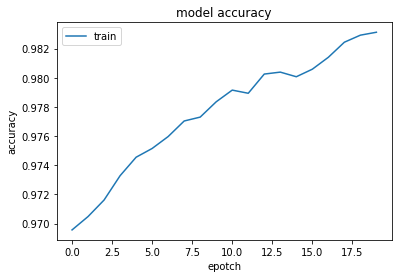

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.xlabel('epotch')
plt.ylabel('accuracy')
plt.legend(['train'], loc='upper left')
plt.show()

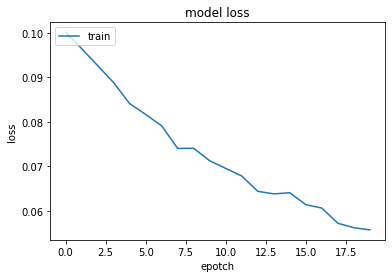

In [17]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.xlabel('epotch')
plt.ylabel('loss')
plt.legend(['train'], loc='upper left')
plt.show()